# Data Literacy
#### University of Tübingen, Winter Term 2020/21
## Exercise Sheet 9
&copy; 2021 Prof. Dr. Philipp Hennig & Agustinus Kristiadi

This sheet is **due on Tuesday 19 January 2021 at 12noon sharp (i.e. before the start of the lecture).**

---

We have seen how we can do simple dimensionality reduction using PCA: just pick several eigenvectors. With $k=2$ latent dimension, a high-dimensional dataset is amenable for visualization. However, PCA is linear model---it might not be able to capture nonlinear relationships between the data and their embeddings. 

Nonlinear embedding algorithms have thus been proposed. t-SNE [1] uses a heavy-tailed function to measure distance between any pair of data. This way, we can represent the data as a collection of vertices and weighted edges---a graph. The normalized distances can further be interpreted as probabilities. The goal is then to find a graph, embedded in the latent space, that is close to the original data's graph as measured by KL-divergence.

In this exercise, we will try to implement t-SNE. The goal main goal is to understand the behind-the-scene of t-SNE better so that we can better utilize it. This is important since t-SNE's hyperparameters are impactful to the end results.


1. Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of machine learning research 9.Nov (2008): 2579-2605.

---

## t-SNE Implementation

**Task.** Read the t-SNE paper, especially Section 1-3.


For convenience here is a summary of the t-SNE's algorithm.

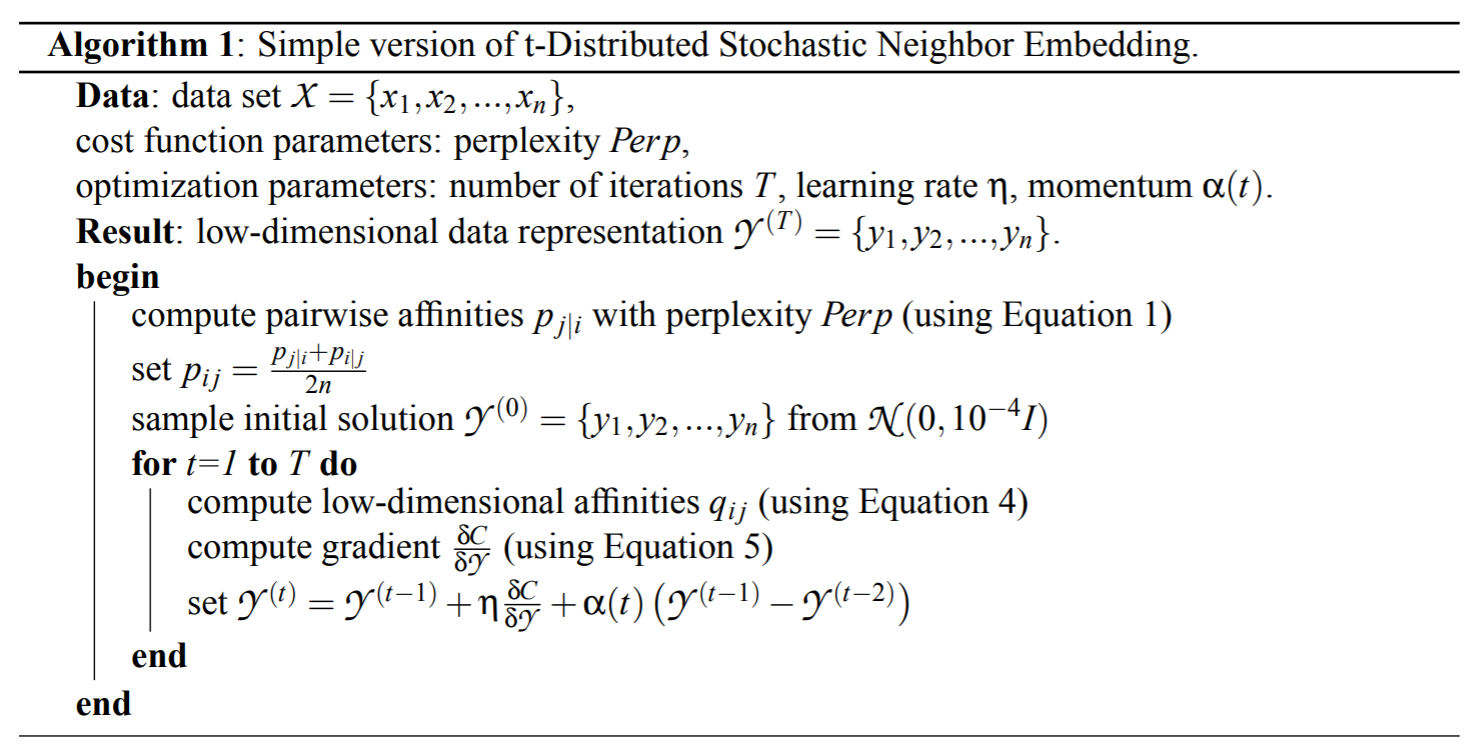

In [1]:
from IPython.display import Image
Image(filename='tsne_algo.png', width=600)

In the above, $Perp$ is a hyperparameter that represent the target perplexity of low-dimensional representations. Meanwhile, $T$, $\eta$, and $\alpha(t)$ are gradient descent's hyperparameters for optimization.

### Step 0. Obtaining a Dataset

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import util


# Prettier pyplot
plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    "font.size": 14,
})


# Dataset
X, y = load_iris(return_X_y=True)
n, n_dim = X.shape
print(X.shape, y.shape)

# Dimensionality of the projection
N_PROJ_DIM = 2

### Step 1. Computing symmetric pairwise affinities

Our first step is to compute each symmetric pairwise affinity $p_{ij}$ given a pair of points $x_i$ and $x_j$.

**Task.** Write a function that returns all pairwise-distance given a data matrix (e.g. $X$). The returned matrix should be of size $n \times n$.

In [ ]:
# Pairwise squared Euclidean distance
def get_dists(X):
    """
    Compute all pairwise distances of each data points x_i in X
    
    Params
        X: data matrix with n rows. Each row is the x_i
        
    Return
        All pairwise distances of each data points x_i in X
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError


# Do not modify
# This is to make sure your implementation does not contain common errors
assert util.test_get_dists(get_dists, X)

**Task.** Recall that for each $i$ we need to compute $p_{j|i}$ that attains the desired perplexity value `perp`. Therefore, write a code that compute the perplexity of a probability vector in the `get_perplexity` function below. 

For your convenience, the function for computing $\beta_i$'s that achieve $Perp$ perplexity is given.

In [ ]:
import math


def get_perplexity(p):
    """
    Returns the perplexity of p. See https://en.wikipedia.org/wiki/Perplexity
    
    Params:
        p: probability vector
        
    Return:
        A single number---the perplexity of p
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError


def get_beta(perp, dists):
    """
    Let beta_i := 2 \sigma_i^2. This function computes (beta_i) that achieve
    the desired perplexity.
    
    Params           
        perp: Desired perplexity value.
        
        dists: Pairwise squared Euclidean distances, stored in an (n x n)-matrix
                
    Return
        betas: (n,) array of beta_i's 
    """    
    return util.binary_search(perp, dists, get_perplexity)

The conditional probability $p_{j | i}$ is defined by

$$
    p_{j | i} := p(x_j | x_i) := \frac{\exp(-\Vert x_i - x_j \Vert^2) / \beta_i}{\sum_{k \neq i} \exp(-\Vert x_i - x_k \Vert^2 / \beta_i)} \qquad \text{where} \enspace p_{i|i} = 0 ,
$$

where each $\beta_i$ is obtained in such a way that it (approximately) achieves the desired perplexity value $Perp$.


**Task.** Use the function `get_beta` to compute **all** $p_{j|i}$'s. Write a function to do that given the data matrix $X$ and a desired perplexity value. This function should return a matrix of $n \times n$. Do not forget to make sure that $p_{j|i} = 0$ for $i = j$ while still ensuring that it is a valid distribution.

In [ ]:
def get_p_j_given_i(X, perp):
    """
    Compute the conditional probabilities p_{j|i}'s
    
    Params
        X: high dimensional data matrix
        perp: the desired perplexity level (single number)

    Return
        (n, n) matrix containing p_{j|i}'s
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError


assert util.test_get_p_j_given_i(get_p_j_given_i, X)

The joint probability $p_{ij}$ is

$$
    p_{ij} := \frac{p_{j|i} + p_{i|j}}{2n} \qquad \text{where} \enspace p_{ii} = 0 ,
$$

for all $i, j \in \{ 1, \dots, n \}$. We assume that the matrix containing all $p_{ij}$ is denoted by $P \in \mathbb{R}^{n \times n}$.


**Task.** Now, write a function for computing all the joint probabilities $p_{ij}$, i.e. computing $P$. You should end up with an $n \times n$ matrix with $p_{ii} = 0$ for all $i=1, \dots, n$, and $\sum_{i=1}^n \sum_{j=1}^n p_{ij} = 1$.

In [ ]:
def get_P(X, perp):
    """
    Compute the joint probabilities p_ij's
    
    Params
        X: high dimensional data matrix
        perp: the desired perplexity level (single number)

    Return
        (n, n) matrix P containing p_ij's
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError
    

assert util.test_get_get_P(get_P, X)

### Step 2. Computing best low-dimensional representations

Here we are going to address the steps inside the loop in the algorithm above. 

The low-dimensional affinities $q_{ij}$ is defined by 

$$
    q_{ij} := \frac{(1 + \Vert y_i - y_j \Vert^2)^{-1}}{\sum_{k \neq l} (1 + \Vert y_k - y_l \Vert^2)^{-1}}  \qquad \text{where} \enspace q_{ii} = 0 ,
$$

for all $i, j \in \{1, \dots, n\}$. We assume that the matrix containing all $q_{ij}$ is denoted by $Q \in \mathbb{R}^{n \times n}$.

**Task.** Construct a function that outputs $q_{ij}$'s (i.e. $Q$) given distances between $y_i$ and $y_j$. The input of this function is an $n \times n$ matrix containing all pairwise distances between $y_i$'s and $y_j$'s. The return value of this function should be an $n \times n$ matrix $Q$, where each row is a valid probability distribution, i.e. $q_{ij} \geq 1$ and $\sum_{i=1}^n \sum_{j=1}^n q_{ij} = 1$. Note that $q_{ii} = 0$ for all $i = 1, \dots, n$.

In [ ]:
def get_Q(dists_y):    
    """
    Compute low-dimensional affinities q_ij
    
    Params
        dists_Y: (n, n) matrix containing all pairwise distances of elements of Y

    Return
        (n, n) matrix Q containing q_ij's
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError


assert util.test_get_Q(get_dists, get_Q)

The cost function---the function we are going to optimize in order to find an optimal embedding $\mathcal{Y}$---is the KL-divergence between $P$ and $Q$:

$$
    C := D_\text{KL}(P \Vert Q) := \sum_{i=1}^n \sum_{j=1}^n p_{ij} \log \frac{p_{ij}}{q_{ij}} .
$$

Since we need to minimize $C$ via gradient descent, we need its gradient:

$$
    \frac{\partial C}{\partial y_i} = 4 \sum_{j=1}^n \frac{(p_{ij} - q_{ij}) (y_i - y_j)}{1 + \Vert y_i - y_j \Vert^2} .
$$


**Task.** For the final task in this step, write a function that computes the $n$ gradient vectors $\left\{ \frac{\partial C}{\partial y_i} \right\}_{i=1}^n$ given $Y$, $P$, $Q$, and all pairwise distances between $y_i$ and $y_j$. Note that each gradient is a vector of length `N_PROJ_DIM`.

In [ ]:
def get_grad(Y, P, Q, dists_Y):
    """
    Compute the KL-divergence gradient
    
    Params
        Y: (n, N_PROJ_DIM) matrix
        P: (n, n) matrix
        Q: (n, n) matrix
        dists_Y: (n, n) matrix containing all pairwise distances of elements of Y

    Return
        (n, N_PROJ_DIM) matrix---each row is the gradient dC/dy_i
    """
    ######################################################
    ##                 YOUR CODE HERE                   ##
    ######################################################
    raise NotImplementedError


assert util.test_get_grad(get_grad, get_P, get_dists, get_Q, X)

### Step 3. Optimization

In [ ]:
Image(filename='tsne_algo.png', width=600)

Since we now have all the necessary ingredients, we are finally ready run the full algorithm. The implementation of the pseudocode is given below.

**Note.** To test the algorithm, look at the plots generated by the test code below. Your aim is to be "better" than PCA---slightly worse than Scikit-Learn's implementation is to be expected. "Better" here is subjective, but the rule of thumb is to obtain a 2D representations that minimize **intra**-cluster distances and maximize **inter**-cluster distances.

In [ ]:
""" Feel free to change this """
perp = 30



""" DO NOT MODIFY ANYTHING BELOW THIS!!! """
""" ------------------------------------ """

from tqdm import trange


def my_tsne(X, perp=30, T=1000, eta=200):
    P = get_P(X, perp)
    Y = np.random.randn(n, N_PROJ_DIM) * 10**(-2)  # Each sampled from N(0, 10^-4)
    v = 0  # veloctiy for Momentum-Gradient-Descent

    progress_bar = trange(T)

    for t in progress_bar:
        dists_Y = get_dists(Y)
        Q = get_Q(dists_Y)

        kl_loss = np.sum(P * (np.log(P+1e-10) - np.log(Q+1e-10)))
        progress_bar.set_description(f'[KL-loss: {kl_loss:.3f}]')

        # An alternative way (relative to the one in the paper) to do gradient descent + momentum
        grads = get_grad(Y, P, Q, dists_Y)
        alpha = 0.5 if t < 250 else 0.8
        v = alpha*v + eta*grads
        Y -= v

    return Y


# Compare with Scikit-Learn's PCA and t-SNE implementation

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


Y = my_tsne(X, perp=perp)
Y_pca = PCA().fit_transform(X)
Y_skl = TSNE(perplexity=30, n_iter=1000, learning_rate=200).fit_transform(X)  # Same hyperparameters to ours

fig, axs = plt.subplots(1, 3, figsize=[12, 3.5])
axs[0].scatter(Y_pca[:, 0], Y_pca[:, 1], c=y, edgecolors='k');
axs[0].set_title('PCA')
axs[1].scatter(Y[:, 0], Y[:, 1], c=y, edgecolors='k');
axs[1].set_title('My t-SNE')
axs[2].scatter(Y_skl[:, 0], Y_skl[:, 1], c=y, edgecolors='k');
axs[2].set_title('Sklearn\'s t-SNE')
plt.tight_layout()



**Task.** Try different perplexity values and write your observations below. What happens when $Perp$ is very small, say $2$? What happens when it is very large, e.g. $1000$? The original t-SNE paper recommends perplexity values between $5$ and $50$. Do you agree with this?

**Answer.** 